# A Practical Learning of Python for Data Analysis and Visualization

## This project analysis will help for the NYPD to take necessary measures and security to NY's borough over the year.

In [16]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

The NYPD data can be found and downloaded at [NYPD 7 Major Felony Incidents](https://data.cityofnewyork.us/Public-Safety/NYPD-7-Major-Felony-Incidents/hyij-8hr7). Lets open it using Pandas

In [24]:
#opening the csv data
Crime_ny_df = pd.read_csv('NYPD_7_Major_Felony_Incidents.csv')

In [25]:
# Let's see a preview of the the first 5 rows of the data
Crime_ny_df.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,1,987726459,09/21/1982 11:20:00 PM,Tuesday,Sep,21,1982,2300,Apr,9,2015,MURDER,FELONY,NaN,079,Brooklyn,NYPD,999634,190253,"(40.688872153, -73.9445290319999)"
1,2,987726401,08/08/1991 10:15:00 PM,Thursday,Aug,8,1991,2200,Mar,10,2015,MURDER,FELONY,A,030,Manhattan,NYPD,996234,238317,"(40.8208008500001, -73.956703266)"
2,3,987726875,03/17/2014 12:00:00 PM,Monday,Mar,17,2014,1200,Jun,26,2015,MURDER,FELONY,NaN,067,Brooklyn,NYPD,999132,175384,"(40.6480609220001, -73.946371991)"
3,4,987725414,07/30/2014 09:41:00 PM,Wednesday,Jul,30,2014,2100,Jan,28,2015,MURDER,FELONY,H,120,Staten Island,NYPD,959784,171202,"(40.6365609370001, -74.0881530469999)"
4,5,987726422,08/08/2014 11:46:00 PM,Friday,Aug,8,2014,2300,Mar,13,2015,MURDER,FELONY,D,041,Bronx,NYPD,1013232,236725,"(40.816391847, -73.895296414)"


In [26]:
# We could also get overall info for the dataset
Crime_ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76755 entries, 0 to 76754
Data columns (total 20 columns):
OBJECTID                  76755 non-null int64
Identifier                76755 non-null int64
Occurrence Date           76755 non-null object
Day of Week               76755 non-null object
Occurrence Month          76755 non-null object
Occurrence Day            76755 non-null int64
Occurrence Year           76755 non-null int64
Occurrence Hour           76755 non-null int64
CompStat Month            76755 non-null object
CompStat Day              76755 non-null int64
CompStat Year             76755 non-null int64
Offense                   76755 non-null object
Offense Classification    76755 non-null object
Sector                    74735 non-null object
Precinct                  76755 non-null object
Borough                   76509 non-null object
Jurisdiction              76746 non-null object
XCoordinate               76755 non-null int64
YCoordinate               76755 non

In [27]:
# lets delete some columns, they are repeated or not important for my analysis.
Drop = ['Occurrence Date', 'OBJECTID', 'Identifier', 'Offense Classification','XCoordinate','YCoordinate','Location 1','Sector',
       'Jurisdiction']
Crime_ny_df =Crime_ny_df.drop(Drop, axis=1)

In [14]:
#description of the data
Crime_ny_df.head()

,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Precinct,Borough
0,Tuesday,Sep,21,1982,2300,Apr,9,2015,MURDER,079,Brooklyn
1,Thursday,Aug,8,1991,2200,Mar,10,2015,MURDER,030,Manhattan
2,Monday,Mar,17,2014,1200,Jun,26,2015,MURDER,067,Brooklyn
3,Wednesday,Jul,30,2014,2100,Jan,28,2015,MURDER,120,Staten Island
4,Friday,Aug,8,2014,2300,Mar,13,2015,MURDER,041,Bronx


In [52]:
# Let's import modules that are very importan for data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# importan for real number devision
from __future__ import division 

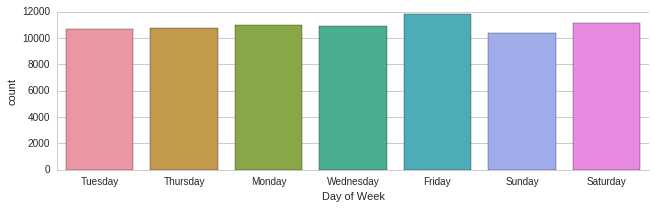

In [66]:
# Let's first check which days are int highest offense
sns.factorplot('Day of Week',data=Crime_ny_df, kind = 'count', size=3, aspect=3)

It looks like on Friday,  there is more offenses and may be peope are drinking. Sundy is the least. Neat!

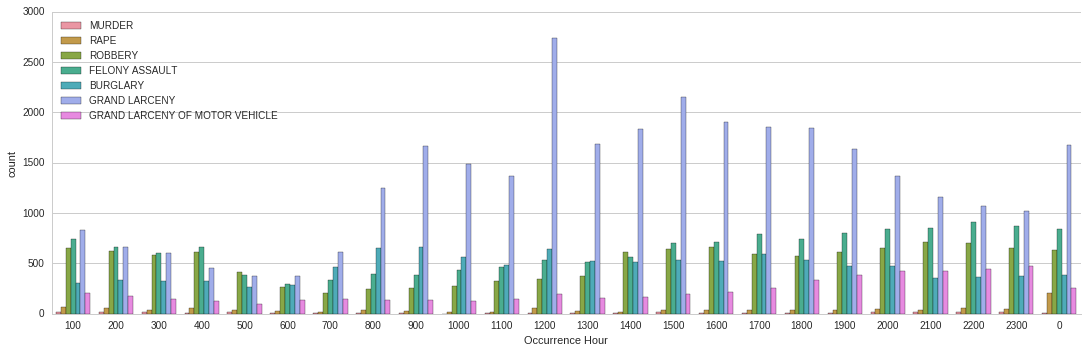

In [67]:
# At what time is more pronounced 
Y = np.array([100,200,300, 400, 500, 600, 700, 800, 900, 1000, 1100,1200,1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,0])
sns.factorplot('Occurrence Hour',data=Crime_ny_df, kind = 'count',aspect = 3, size = 5, order=Y,
               hue = 'Offense', legend = False)
plt.legend(loc='upper left')

From morning to midnight, it more offensive time. 

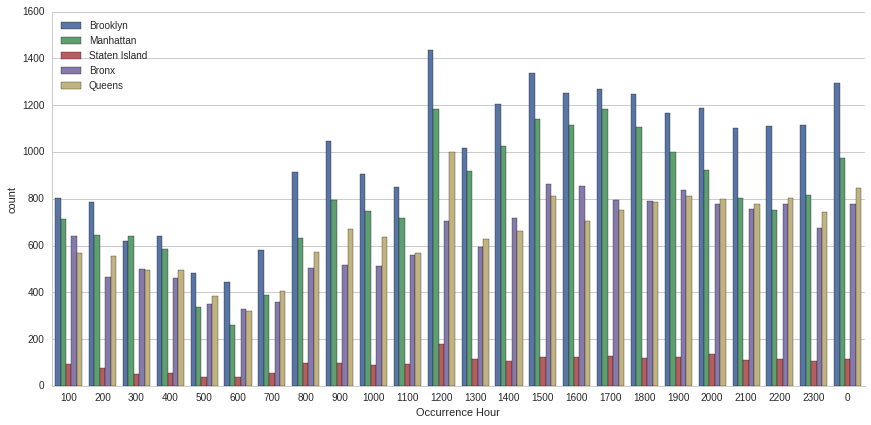

In [69]:
# At what time is more pronounced in each cities
Y = np.array([100,200,300, 400, 500, 600, 700, 800, 900, 1000, 1100,1200,1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,0])
sns.factorplot('Occurrence Hour',data=Crime_ny_df, hue ='Borough', kind = 'count',aspect = 2.0, size = 6,
               order=Y,  legend = False)
plt.legend(loc='upper left')

Starting from morning, offenses increase until midnight and then after midnight it decreases. Brooklyn and Manhattan has more offenses.

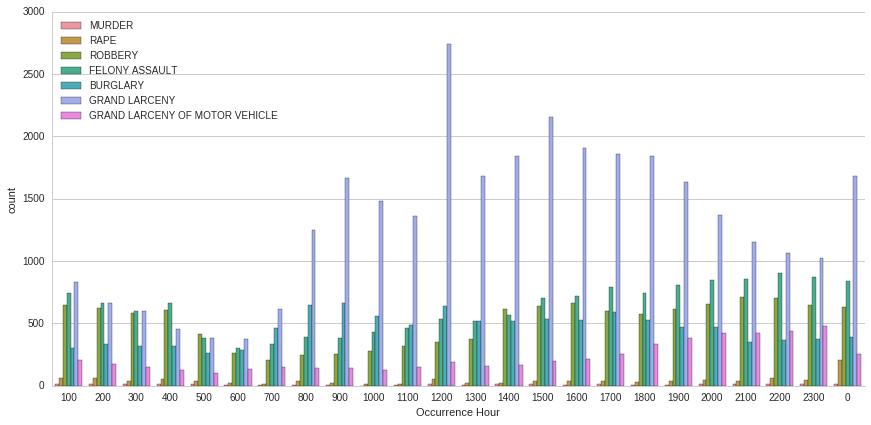

In [44]:
# Lets see what type of crime is more happening in the day time.
sns.factorplot('Occurrence Hour',data=Crime_ny_df,hue='Offense', kind = 'count', aspect = 2.0, size = 6,
                legend = False, order = Y)

plt.legend(loc='upper left')

All offenses increase from morining to midnight and then decreases. Grand Larceny is the highest offense all on those time.

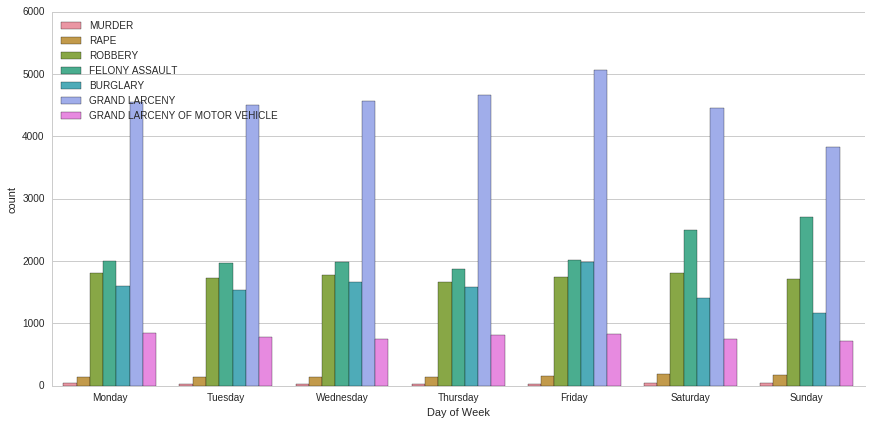

In [73]:
# Lets see what type of crime is more happening in days
DD = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sns.factorplot('Day of Week',data=Crime_ny_df,hue='Offense', kind = 'count', aspect = 2, size = 6,
               order = DD, legend = False)
plt.legend(loc='upper left')

Felony assault is more common in the weekend.

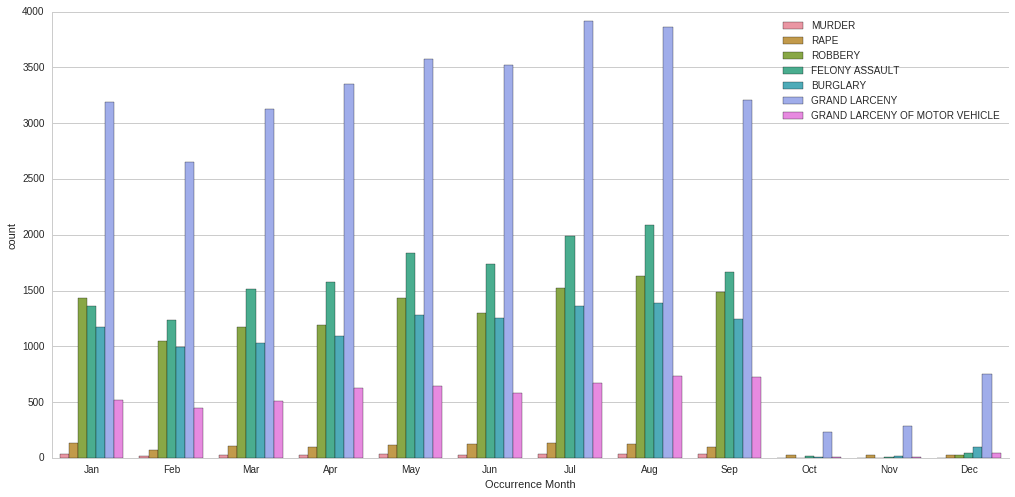

In [74]:
# Lets see what type of crime is more happening in months, first we have to order the months manually
X = ['Jan', 'Feb','Mar', 'Apr', 'May','Jun','Jul','Aug','Sep', 'Oct','Nov', 'Dec']
sns.factorplot('Occurrence Month',data=Crime_ny_df, hue = 'Offense', kind = 'count',aspect = 2,
               size = 7,order = X, legend=False) 
plt.legend(loc='upper right')

In Summer,  it looks more offenses occur. It is interesting that Oct, Nov and Dec have the least offense records. This may help policy makers to look at why and devise policy based on that. 

In [162]:
X = Crime_ny_df['Occurrence Year']

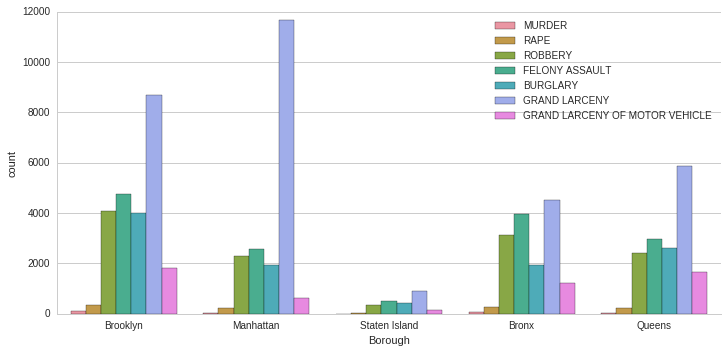

In [77]:
sns.factorplot('Borough',data=Crime_ny_df, hue = 'Offense', kind = 'count',aspect = 2, size = 5, legend = False)
plt.legend(loc='upper right')

Brooklyn and Manhaton are more offense in grand larceny offense.

In [55]:
Total_crime = ((Crime_ny_df.groupby(['Borough'])['Offense']).count())
Total_crime

Borough
Bronx            15106
Brooklyn         23824
Manhattan        19406
Queens           15793
Staten Island     2380
Name: Offense, dtype: int64

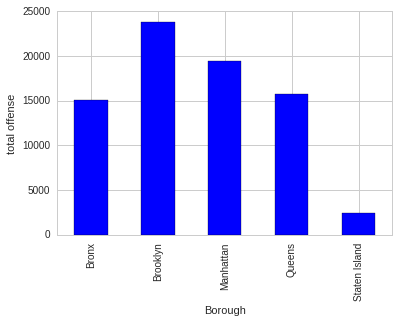

In [56]:
Total_crime.plot(kind='bar')
plt.ylabel('total offense')

Brooklyn has the most offense in total.

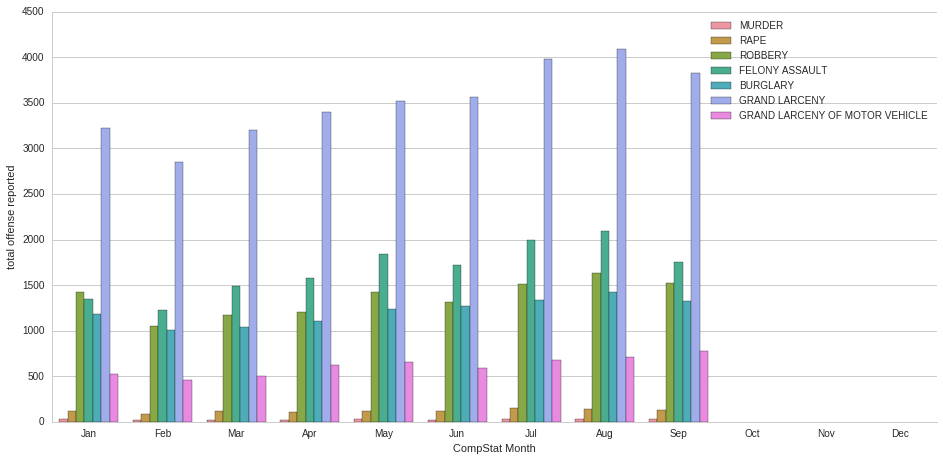

In [88]:
X = ['Jan', 'Feb','Mar', 'Apr', 'May','Jun','Jul','Aug','Sep', 'Oct','Nov', 'Dec']
sns.factorplot('CompStat Month', data = Crime_ny_df, hue='Offense', kind = 'count', order = X,
               size=6.5, aspect=2, legend = False)
plt.legend(loc='upper right')
plt.ylabel('total offense reported')

There is no police report in Oct, Nov, Dec.

In [61]:
#sns.factorplot('CompStat Day', data = Crime_ny_df, hue='Offense', kind = 'count', size=6, aspect=2)
Report = Crime_ny_df[['CompStat Month', 'CompStat Day','Offense']]
Report.head()

,CompStat Month,CompStat Day,Offense
0,Apr,9,MURDER
1,Mar,10,MURDER
2,Jun,26,MURDER
3,Jan,28,MURDER
4,Mar,13,MURDER


# reported year of offense

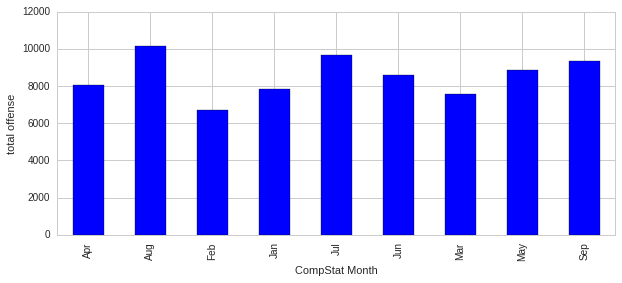

In [62]:
plt.rcParams['figure.figsize'] = (10, 4)
Report.groupby(['CompStat Month'])['Offense'].count().plot(kind = 'bar')
plt.ylabel('total offense')

In [186]:
sorted(Crime_ny_df['Occurrence Year'].unique())

[1915,
 1950,
 1975,
 1982,
 1991,
 1993,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

Some of the offenses happened long time ago and I think it reported or found in 2015.

In [187]:
Crime_ny_df['CompStat Year'].unique()

array([2015], dtype=int64)

All reported in 2015.